In [35]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn import set_config
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.pipeline import make_pipeline
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
import pandas as pd
set_config(display='diagram')

In [4]:
X, y = make_classification(
    n_features=20, n_informative=3, n_redundant=0, n_classes=2,
    n_clusters_per_class=2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [40]:
anova_filter = SelectKBest(f_classif)
clf = LinearSVC()
param_dict = dict(anova_filter__k=[1,2,3,4,5,6])
anova_svm = Pipeline([('anova_filter',anova_filter), ('clf',clf)])
anova_svm.fit(X_train, y_train)
#grid_search = GridSearchCV(anova_svm, param_dict)
#grid_search.fit(X_train, y_train)

Pipeline(steps=[('anova_filter', SelectKBest()), ('clf', LinearSVC())])

In [43]:
grid_search.best_estimator_

Pipeline(steps=[('anova_filter', SelectKBest(k=1)), ('clf', LinearSVC())])

In [36]:
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_anova_filter__k,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.002750,0.000398,0.001381,0.000693,1,{'anova_filter__k': 1},0.933333,0.800000,1.000000,0.933333,0.800000,0.893333,0.080000,1
1,0.002834,0.001125,0.000757,0.000282,2,{'anova_filter__k': 2},0.800000,0.866667,0.866667,0.933333,0.666667,0.826667,0.090431,6
2,0.002081,0.000373,0.000508,0.000031,3,{'anova_filter__k': 3},0.866667,0.933333,1.000000,0.933333,0.666667,0.880000,0.114698,2
3,0.001733,0.000138,0.000487,0.000016,4,{'anova_filter__k': 4},0.866667,0.933333,0.866667,0.933333,0.666667,0.853333,0.097980,4
4,0.001769,0.000142,0.000485,0.000026,5,{'anova_filter__k': 5},0.866667,0.933333,0.866667,0.933333,0.666667,0.853333,0.097980,4
5,0.001787,0.000141,0.000519,0.000059,6,{'anova_filter__k': 6},0.866667,0.933333,0.866667,1.000000,0.666667,0.866667,0.111555,3


In [37]:
grid_search.best_params_

{'anova_filter__k': 1}

In [41]:
from sklearn.metrics import classification_report

y_pred = anova_svm.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      0.73      0.85        15
           1       0.71      1.00      0.83        10

    accuracy                           0.84        25
   macro avg       0.86      0.87      0.84        25
weighted avg       0.89      0.84      0.84        25



In [21]:
anova_svm[-1].coef_

array([[0.75790801, 0.27159284, 0.2610942 ]])

In [11]:
anova_svm[:-1].inverse_transform(anova_svm[-1].coef_)


array([[0.        , 0.        , 0.75790801, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.27159284,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.2610942 ]])

In [14]:
import matplotlib.pyplot as plt

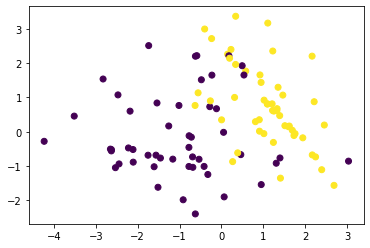

In [20]:
plt.scatter(X[:,2], X[:,9],c=y)